In [1]:
# Analysis for the population data set:
# https://www.kaggle.com/datasets/census/population-time-series-data?select=POP.csv

In [2]:
#!pip install pmdarima

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
# Plot time series
df_original = pd.read_csv("POP.csv")
df_original

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [41]:
df = df_original.drop(['realtime_start', 'realtime_end'], axis=1)
df["date"] = pd.to_datetime(df["date"])
df.set_index("date",inplace=True)
df

,value
date,
1952-01-01,156309.000
1952-02-01,156527.000
1952-03-01,156731.000
1952-04-01,156943.000
1952-05-01,157140.000
...,...
2019-08-01,329591.333
2019-09-01,329785.872
2019-10-01,329982.035


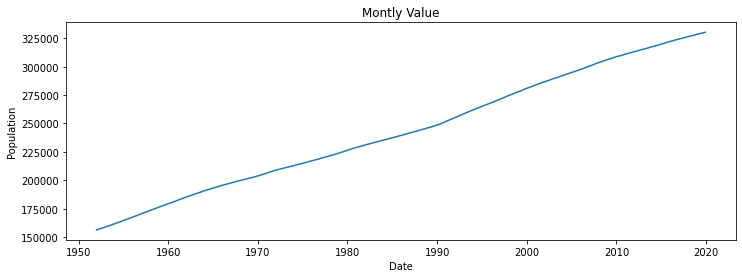

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(df)
plt.title("Montly Value")
plt.xlabel("Date")
plt.ylabel("Population")
plt.show()

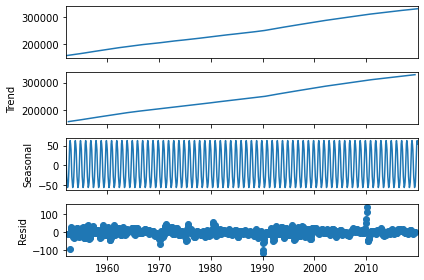

In [43]:
# Decompose the time series

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

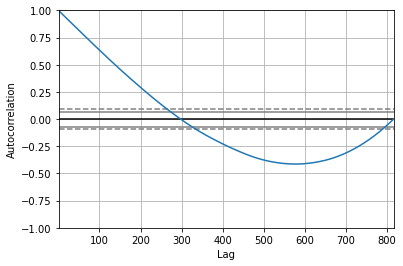

In [44]:
# Calculate and plot ACF (Auto-Correlation Function)
pd.plotting.autocorrelation_plot(df['value'])

In [45]:
df['value'].corr(df['value'].shift(300))

0.9952561189913822

In [46]:
# Autocorrelation hits a 99% confidence level almost at 280 lag points.

In [64]:
# Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)

test_results = adfuller(df['value'])
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -0.6653174110243235
P-Value:  0.8555297778919774


In [65]:
# Null Hypothesis (H0): Series is non-stationary
# Alternate Hypothesis (HA): Series is stationary
# p-value >0.05 Fail to reject (H0)
# p-value <= 0.05 Accept (H1)
# pvalue = 0.855 thats mean the data is not stationary. 

<AxesSubplot:xlabel='date'>

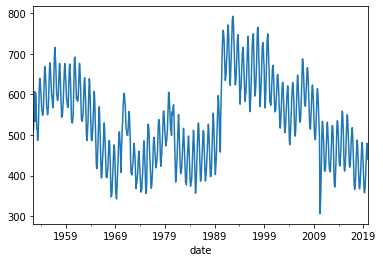

In [66]:
# If there is the trend - remove it from the Time Series
# There is a positive trend from 1952 to 2019
rolling_mean = df['value'].rolling(window=6).mean()
data_no_trend = df['value'] - rolling_mean
data_no_trend = data_no_trend[data_no_trend.notnull()]
data_no_trend = data_no_trend.dropna()
data_no_trend.plot()

In [67]:
test_results = adfuller(data_no_trend)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -1.643416193417271
P-Value:  0.46047629540306956


In [51]:
# the data is stationary now p-value  = 0.46

<AxesSubplot:xlabel='date'>

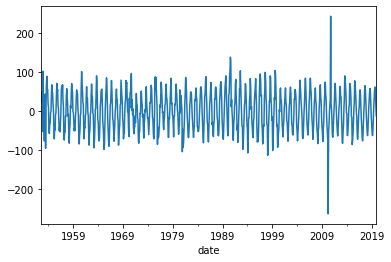

In [68]:
# Check seasonality 
data_cleared = no_trend_data.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

In [69]:
# there is no seasonality

In [71]:
# Run automatic ARIMA model determination. Find the best model, give summary and display the results 
# (existing time range + future)

In [83]:
model = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results = model.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7238.639, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8630.247, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7975.450, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8155.894, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8628.258, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8141.903, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7637.179, Time=0.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=7234.965, Time=1.95 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=7490.548, Time=1.19 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=7363.307, Time=2.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=7392.427, Time=2.61 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=7434.785, Time=1.53 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7

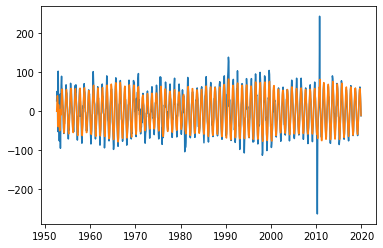

In [84]:
#ARIMA(3,0,2)

plt.plot(data_cleared)
plt.plot(results.fittedvalues())

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  809
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -3610.540
Date:                Sun, 23 Jul 2023   AIC                           7233.081
Time:                        19:58:15   BIC                           7261.255
Sample:                    08-01-1952   HQIC                          7243.898
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8246      0.026     70.600      0.000       1.774       1.875
ar.L2         -1.1624      0.045    -26.100      0.000      -1.250      -1.075
ar.L3          0.0947      0.026      3.684      0.000       0.044       0.145
ma.L1         -1.6248      0.015   -111.889      0.000      -1.653      -1.596
ma.L2          0.9092      0.012     74.934      0.000       0.885       0.933
sigma2       437.2668      7.563     57.814      0.000     422.443     452.091
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17246.16
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.16
Prob(H) (two-sided):                  0.27   Kurtosis:                        25.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the ARIMA model analysis for population data, it can be concluded that the model doesn't exhibits a good fit with the test data. It doesn't cach low and high values.